In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sc

from sklearn.linear_model import LinearRegression

np.random.seed(42)

In [85]:
df = pd.read_csv('data/Questionnaire to Benchmark Explainable AI Methods.csv')

In [86]:
df = df.drop('Timestamp', axis=1)
df = df.dropna()


In [87]:
original_column_names = df.columns

In [88]:
new_columns = [f'question {i}' for i in range(1,26)]
df.columns = new_columns
df.head(15)

,question 1,question 2,question 3,question 4,question 5,question 6,question 7,question 8,question 9,question 10,...,question 16,question 17,question 18,question 19,question 20,question 21,question 22,question 23,question 24,question 25
0,No,Bachelor,Other,0,No,2.0,5.0,2.0,4.0,1.0,...,2.0,3.0,1.0,1.0,1.0,1.0,4.0,2.0,4.0,5.0
1,Yes,Master,Data Science,Many,Yes,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,No,Bachelor,Psychology,1,No,6.0,5.0,4.0,5.0,5.0,...,5.0,5.0,4.0,5.0,4.0,6.0,6.0,5.0,6.0,6.0
3,No,Bachelor,Psychology,0,No,5.0,5.0,7.0,5.0,3.0,...,2.0,1.0,1.0,4.0,1.0,6.0,7.0,7.0,3.0,5.0
4,No,Master,Economics/Business,0,Yes,2.0,3.0,3.0,3.0,3.0,...,4.0,5.0,4.0,6.0,4.0,4.0,7.0,6.0,5.0,6.0
8,No,Other,Natural Sciences,0,No,4.0,5.0,5.0,3.0,5.0,...,6.0,5.0,6.0,5.0,6.0,4.0,4.0,3.0,3.0,4.0
9,No,Master,Law,0,No,6.0,6.0,4.0,6.0,5.0,...,1.0,1.0,3.0,1.0,1.0,6.0,6.0,5.0,6.0,6.0
10,No,Bachelor,Engineering,0,No,4.0,3.0,4.0,2.0,3.0,...,7.0,6.0,7.0,6.0,7.0,7.0,7.0,7.0,7.0,7.0
11,No,Master,Economics/Business,3,Yes,5.0,4.0,6.0,5.0,3.0,...,5.0,4.0,5.0,5.0,5.0,5.0,6.0,4.0,5.0,5.0
12,No,Master,Engineering,0,No,4.0,3.0,4.0,5.0,4.0,...,4.0,4.0,6.0,4.0,4.0,6.0,4.0,6.0,5.0,5.0


In [89]:
ml_background = df[df['question 3'] == 'AI']
ml_background = ml_background.append(df[df['question 3'] == 'Data Science'])
ml_background

,question 1,question 2,question 3,question 4,question 5,question 6,question 7,question 8,question 9,question 10,...,question 16,question 17,question 18,question 19,question 20,question 21,question 22,question 23,question 24,question 25
13,No,Master,AI,Many,Yes,6.0,6.0,4.0,6.0,5.0,...,3.0,3.0,3.0,3.0,3.0,6.0,6.0,6.0,6.0,6.0
35,Yes,Master,AI,Many,Yes,6.0,6.0,6.0,7.0,4.0,...,7.0,7.0,7.0,7.0,5.0,4.0,4.0,4.0,4.0,4.0
36,No,Master,AI,Many,Yes,2.0,6.0,1.0,4.0,4.0,...,5.0,2.0,2.0,2.0,2.0,6.0,5.0,4.0,5.0,5.0
37,Yes,Master,AI,Many,Yes,6.0,4.0,1.0,7.0,4.0,...,7.0,7.0,2.0,6.0,5.0,6.0,5.0,2.0,5.0,6.0
41,No,Master,AI,Many,Yes,5.0,5.0,5.0,3.0,2.0,...,1.0,1.0,1.0,1.0,1.0,5.0,6.0,4.0,4.0,4.0
42,No,Master,AI,Many,Yes,7.0,7.0,7.0,5.0,6.0,...,5.0,5.0,6.0,4.0,6.0,7.0,6.0,6.0,7.0,6.0
1,Yes,Master,Data Science,Many,Yes,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
23,No,Master,Data Science,Many,Yes,7.0,5.0,6.0,4.0,5.0,...,6.0,6.0,6.0,6.0,7.0,6.0,6.0,5.0,6.0,7.0
26,No,Master,Data Science,4,No,2.0,2.0,4.0,2.0,2.0,...,2.0,2.0,2.0,4.0,3.0,3.0,2.0,1.0,3.0,3.0
30,No,Master,Data Science,3,Yes,5.0,5.0,6.0,6.0,6.0,...,6.0,7.0,7.0,5.0,6.0,6.0,7.0,7.0,5.0,6.0


In [90]:
non_ml_background = df.drop(index=ml_background.index)
non_ml_background

,question 1,question 2,question 3,question 4,question 5,question 6,question 7,question 8,question 9,question 10,...,question 16,question 17,question 18,question 19,question 20,question 21,question 22,question 23,question 24,question 25
0,No,Bachelor,Other,0,No,2.0,5.0,2.0,4.0,1.0,...,2.0,3.0,1.0,1.0,1.0,1.0,4.0,2.0,4.0,5.0
2,No,Bachelor,Psychology,1,No,6.0,5.0,4.0,5.0,5.0,...,5.0,5.0,4.0,5.0,4.0,6.0,6.0,5.0,6.0,6.0
3,No,Bachelor,Psychology,0,No,5.0,5.0,7.0,5.0,3.0,...,2.0,1.0,1.0,4.0,1.0,6.0,7.0,7.0,3.0,5.0
4,No,Master,Economics/Business,0,Yes,2.0,3.0,3.0,3.0,3.0,...,4.0,5.0,4.0,6.0,4.0,4.0,7.0,6.0,5.0,6.0
8,No,Other,Natural Sciences,0,No,4.0,5.0,5.0,3.0,5.0,...,6.0,5.0,6.0,5.0,6.0,4.0,4.0,3.0,3.0,4.0
9,No,Master,Law,0,No,6.0,6.0,4.0,6.0,5.0,...,1.0,1.0,3.0,1.0,1.0,6.0,6.0,5.0,6.0,6.0
10,No,Bachelor,Engineering,0,No,4.0,3.0,4.0,2.0,3.0,...,7.0,6.0,7.0,6.0,7.0,7.0,7.0,7.0,7.0,7.0
11,No,Master,Economics/Business,3,Yes,5.0,4.0,6.0,5.0,3.0,...,5.0,4.0,5.0,5.0,5.0,5.0,6.0,4.0,5.0,5.0
12,No,Master,Engineering,0,No,4.0,3.0,4.0,5.0,4.0,...,4.0,4.0,6.0,4.0,4.0,6.0,4.0,6.0,5.0,5.0
14,No,Other,Engineering,2,No,4.0,3.0,5.0,3.0,3.0,...,4.0,3.0,3.0,4.0,4.0,5.0,5.0,5.0,6.0,5.0


In [91]:
def get_histo_grid(safe_fig=False):
    """
    This function creates a histogram for each question.
    The data is segmented based on ML-Background
    @param safe_fig: defines if the figure is saved as .png
    @return: None
    """
    fig, axs = plt.subplots(4,5)
    fig.set_size_inches(37, 22)
    # fig.subplots_adjust(hspace=1.0, wspace=1.0)
    for i in range(6,26):
        data = [non_ml_background[f'question {i}'], ml_background[f'question {i}']]
        row = (i-6)//5
        col = (i-6)%5
        # axs[row,col].set_size_inches(18.5, 10.5)
        axs[row,col].hist(data, bins=7, histtype='bar',  label=['non_ml_background', 'ml_background'])
        axs[row,col].set_title(original_column_names[i-1])
        axs[row,col].legend()
    # plt.legend()
    plt.tight_layout()
    if safe_fig:
        plt.savefig('histo_grid')

# get_histo_grid(safe_fig=True)


# some regressions



In [92]:

def get_regression_coeff(att_1=None, att_2=None):
    """
    This function returns all linear regression coefficients.
    if att_1 and att_2 are specified 1 regression coefficient is returned
    @param att_1: column index you want to regress from
    @param att_2: column index you want to regress to
    @return: one or all regression coefficients
    """
    if att_1 == None and att_2 == None:
        coeffs = np.zeros((20,20))
        for i in range(5,25):
            for j in range(5,25):
                X = df.iloc[:,i].values.reshape(-1,1)
                Y = df.iloc[:,j].values.reshape(-1,1)

                lin_reg = LinearRegression()
                lin_reg.fit(X,Y)
                coeffs[i-6,j-6] = lin_reg.coef_

        return coeffs
    else:
        X = df.iloc[:,att_1].values.reshape(-1,1)
        Y = df.iloc[:,att_2].values.reshape(-1,1)
        lin_reg = LinearRegression()
        lin_reg.fit(X,Y)

        return lin_reg.coef_
get_regression_coeff()




array([[1.        , 0.7147016 , 0.75545852, 0.80058224, 0.27802038,
        0.26200873, 0.41484716, 0.23871907, 0.18267831, 0.4279476 ,
        0.3588064 , 0.43304221, 0.15866084, 0.27438137, 0.41630277,
        0.45050946, 0.48981077, 0.3202329 , 0.40029112, 0.83114993],
       [0.57674236, 1.        , 0.46397807, 0.58476899, 0.14565388,
        0.10591229, 0.46906813, 0.07008614, 0.10277995, 0.36530932,
        0.33379013, 0.58907596, 0.34475333, 0.42501958, 0.39702428,
        0.3811668 , 0.56362569, 0.27055599, 0.3114722 , 0.7261159 ],
       [0.60987074, 0.46415981, 1.        , 0.72032902, 0.37955347,
        0.38836663, 0.35840188, 0.51645123, 0.36016451, 0.3560517 ,
        0.39306698, 0.37720329, 0.35428907, 0.31316099, 0.35898942,
        0.2773208 , 0.33901293, 0.25146886, 0.32197415, 0.61045828],
       [0.73300755, 0.6634829 , 0.81697024, 1.        , 0.45246557,
        0.3893825 , 0.4848956 , 0.54464682, 0.43647268, 0.57641048,
        0.56730342, 0.69702355, 0.48911595, 0

In [111]:
def get_advanced_correlation_info():
    """
    Calculates Perarson correlation and student-t-test for every pair of features.
    the third axis is used to differenciate between test, stats-value and p-value
    @return: array with shape(20,20,4)
        shape(:,:,0) = pearsons correlation coefficient
        shape(:,:,1) = two sided p-value
        shape(:,:,2) = calculated t-test statistic
        shape(:,:,3) = two sided p-value
    """
    coeffs = np.zeros((20,20,4))


    # calc Pearson correlation coefficients
    for i in range(5,25):
        for j in range(5,25):
            x = ml_background.iloc[:,i].values
            y = non_ml_background.iloc[:,j].values
            y = np.random.choice(y, size=len(x))
            stats, p = sc.pearsonr(x,y)
            coeffs[i-6,j-6, 0] = stats
            coeffs[i-6,j-6, 1] = p


    # calc student t test coefficients
    for i in range(5,25):
            for j in range(5,25):
                x = ml_background.iloc[:,i].values
                y = non_ml_background.iloc[:,j].values
                stats, p = sc.ttest_ind(x,y, equal_var=False)
                coeffs[i-6,j-6, 2] = stats
                coeffs[i-6,j-6, 3] = p


    return coeffs

get_advanced_correlation_info()


array([[[-0.48375443,  0.09394911,  0.38354517,  0.70512624],
        [-0.33177813,  0.26809741,  0.12616853,  0.90073856],
        [-0.12277876,  0.68945296,  0.56466576,  0.57789431],
        ...,
        [ 0.25637928,  0.39782394, -0.71105499,  0.48505383],
        [-0.04215673,  0.89123494, -0.52297636,  0.60679488],
        [-0.32239303,  0.28268826,  0.12564956,  0.90113097]],

       [[-0.11440431,  0.70977862, -0.56072514,  0.58168162],
        [ 0.45661844,  0.11676339, -0.77704265,  0.44658626],
        [-0.07771515,  0.80076854, -0.3868801 ,  0.70303412],
        ...,
        [-0.06061677,  0.84405147, -1.52697608,  0.14409635],
        [ 0.13712592,  0.65507899, -1.36900933,  0.18828779],
        [-0.18843301,  0.53755729, -0.77456505,  0.44791751]],

       [[-0.01940285,  0.94983511, -0.3371425 ,  0.73977944],
        [-0.57883179,  0.03819953, -0.55617387,  0.58449275],
        [ 0.40734204,  0.16712096, -0.16614444,  0.86975019],
        ...,
        [ 0.16208631,  0.59

todo:
- check code
- check correlation coefficients

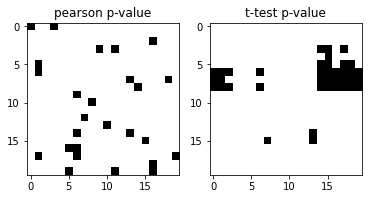

In [157]:
def visualize_p_values(threshold = 0.05):
    """
    This function turns visualizes the p-values. It transform all p-values above a threshold
    every pixel represents a p-value. All colored in white are above the given threshold.
    @return: figure with 2 images representing p-values.
    """
    fig, ax = plt.subplots(1,2)
    coeffs = get_advanced_correlation_info()

    coeffs[:,:,1] = np.where(coeffs[:,:,1] > threshold, 0, 1)
    ax[0].imshow(coeffs[:,:,1], cmap='binary')
    ax[0].set_title('pearson p-value')


    coeffs[:,:,3] = np.where(coeffs[:,:,3] > threshold, 0, 1)
    ax[1].imshow(coeffs[:,:,3], cmap='binary')
    ax[1].set_title('t-test p-value')


    return plt.show()

visualize_p_values()